In [25]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных

In [26]:
import torchvision.datasets

train = torchvision.datasets.FashionMNIST('./', download = True, train = True)
test = torchvision.datasets.FashionMNIST('./', download = True, train = False)

In [27]:
x_train = train.train_data
y_train = train.train_labels
x_test = test.test_data
y_test = test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [28]:
x_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [29]:
x_train = x_train.float()
x_test = x_test.float()
x_train.shape, x_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

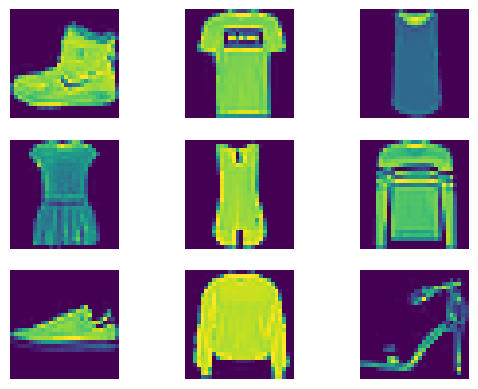

In [30]:
fig, axs = plt.subplots(3, 3)
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.imshow(x_train[i, :, :])
  ax.axis('off')
plt.show()

In [31]:
y_train.unique() #10 классов

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
x_train = x_train.reshape([-1, 28*28])
x_test = x_test.reshape([-1, 28*28])

print(x_train)
x_train.shape

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


torch.Size([60000, 784])

# Создание сети

In [135]:
def FashionMNISTnet(input, output):
  return th.nn.Sequential(
      th.nn.Linear(input, output),
      th.nn.Tanh(),
      th.nn.Linear(output, output)
  )

In [136]:
def test_optim(net, opt, batch_size=100, epochs=50):
  loss = th.nn.CrossEntropyLoss()
  loss_values_train = []
  loss_values_test = []
  for epoch in range(epochs):
    order = np.random.permutation(len(x_train))
    for start_index in range (0,len(x_train), batch_size):
      opt.zero_grad()
      batch_index = order[start_index:start_index+batch_size]
      x_batch = x_train[batch_index]
      y_batch = y_train[batch_index]
      y_preds = net(x_batch)
      loss_val = loss(y_preds, y_batch)
      loss_val.backward()
      opt.step()
    with th.no_grad():
     y_pred_train = net(x_train)
     y_pred_test = net(x_test)
     loss_train = loss(y_pred_train, y_train)
     loss_test = loss(y_pred_test, y_test)
     loss_values_train.append(loss_train.item())
     loss_values_test.append(loss_test.item())
  return loss_values_train, loss_values_test

In [137]:
loss_optim = {}

# Тест momentum

In [138]:
net = FashionMNISTnet(784, 10)
loss_optim["Momentum"] = test_optim(net, th.optim.SGD(net.parameters(), lr=0.001, momentum=0.9))

# Тест AdaGrad

In [139]:
net = FashionMNISTnet(784, 10)
loss_optim["AdaGrad"] = test_optim(net, th.optim.Adagrad(net.parameters(), lr=0.001))

# Тест RMSProp

In [140]:
net = FashionMNISTnet(784, 10)
loss_optim["RMSProp"] = test_optim(net, th.optim.RMSprop(net.parameters(), lr=0.001, weight_decay=0.01))

# Тест Adam

In [141]:
net = FashionMNISTnet(784, 10)
loss_optim["Adam"] = test_optim(net, th.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999)))

# Дополнительно: тест AdaDelta

In [142]:
net = FashionMNISTnet(784, 10)
loss_optim["AdaDelta"] = test_optim(net, th.optim.Adadelta(net.parameters(), lr=0.001, rho=0.9))

# Дополнительно: тест AdaMax

In [143]:
net = FashionMNISTnet(784, 10)
loss_optim["AdamMax"] = test_optim(net, th.optim.Adamax(net.parameters(), lr=0.001, betas=(0.9, 0.999)))

# Графики ошибки

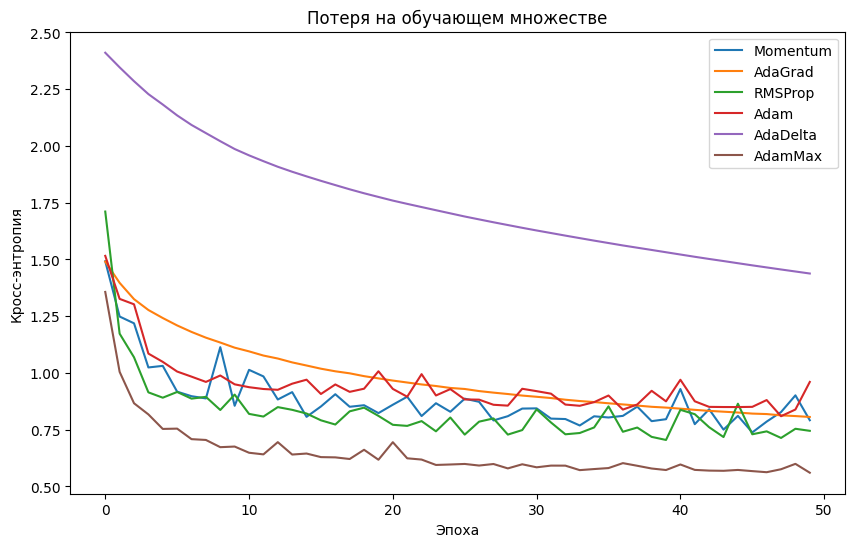

In [144]:
plt.figure(figsize=(10,6))
for optim in loss_optim.keys():
  plt.plot(loss_optim[optim][0], label=optim)
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на обучающем множестве")
plt.legend()
plt.show()

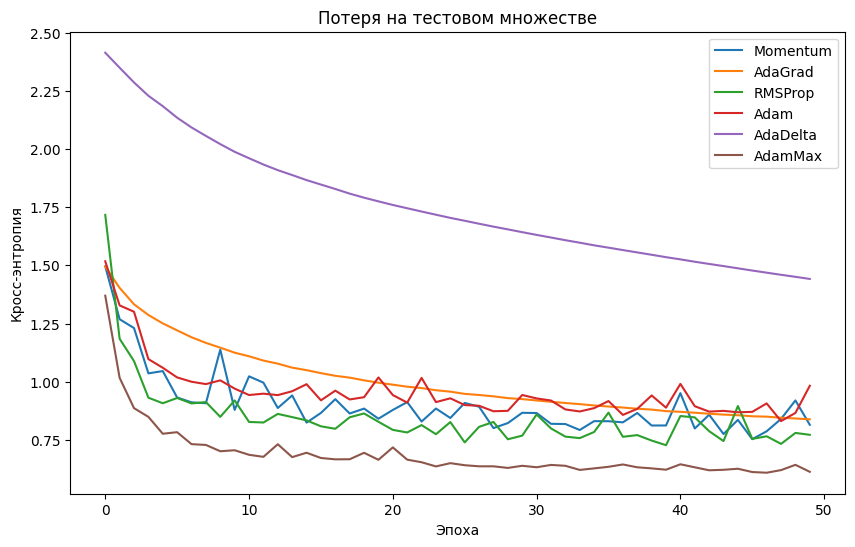

In [145]:
plt.figure(figsize=(10,6))
for optim in loss_optim.keys():
  plt.plot(loss_optim[optim][1], label=optim)
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на тестовом множестве")
plt.legend()
plt.show()